In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.io
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy import misc

%matplotlib inline

# Hide warnings
import warnings

warnings.filterwarnings('ignore')



[[  59.   60.   73. ...,  224.  244.  235.]
 [  14.   10.   11. ...,   88.   82.   73.]
 [  93.   92.   91. ...,  105.  105.  103.]
 ..., 
 [  31.   40.   36. ...,   71.   71.   93.]
 [  80.   76.   74. ...,  198.  200.  170.]
 [ 130.  130.  130. ...,   58.   58.   58.]]
[[  13.   13.   15. ...,  138.  156.  156.]
 [  19.   20.   21. ...,  159.  152.  141.]
 [   9.    9.   16. ...,  109.  120.  126.]
 ..., 
 [   7.    6.    3. ...,  232.  240.  245.]
 [  18.   12.   12. ...,  203.  187.  176.]
 [  10.    7.   11. ...,   86.   87.   88.]]
[   8   12   23   29   34   44   45   53   62   63   75   84   85   92  102
  109  119  129  151  162  184  191  192  195  219  230  242  248  270  271
  278  299  306  341  343  346  372  376  401  404  410  411  412  440  450
  467  501  502  510  532  536  539  547  549  550  563  569  574  603  614
  623  624  632  642  649  656  667  670  691  692  702  717  724  735  749
  759  770  773  782  784  811  824  839  846  886  893  894  916  944  950


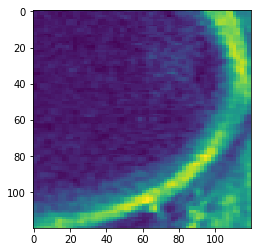

In [44]:
import numpy as np
import pandas as pd


mfc = np.load('z1.npy')
print(mfc)
lfc = np.load('z2.npy')
print(lfc)
drop = np.load('dropped.npy')
print(drop)
df = pd.read_csv('clean_all_path.csv')

df1=df.drop(df.index[drop])
df1=df1.reset_index()
df2= pd.DataFrame({'lfci':lfc.tolist(),'mfci':mfc.tolist()})
df3= pd.concat([df1, df2],axis=1)
bins1 = [ -math.inf, 1, 6]
bins2 = [ -math.inf, 1, 3]
#labels
levels = ['0', '1']
df3['lesionl'] = pd.cut(df3['lfcWorms'], bins1, labels=levels) 
df3['lesionm'] = pd.cut(df3['mfcWorms'], bins1, labels=levels) 
df3['edemal'] = pd.cut(df3['lfcBME'], bins2, labels=levels) 
df3['edemam'] = pd.cut(df3['mfcBME'], bins2, labels=levels) 
print(df3)


print(lfc.shape)
import os
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.mlab import PCA


plt.imshow(lfc[0].reshape(120,120))


In [120]:
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
z1_aug = []
import skimage.transform 
from skimage.transform import warp, AffineTransform
for i in range(0,1585):
    
    tform = AffineTransform(scale=(1.13, 1.1), rotation=0.003, shear=0.2, translation=(2.5, 5))
    image = warp(lfc[i].reshape(120,120), tform.inverse)
    z1_aug.append(image.ravel())

print(z1_aug)

df1_aug = pd.DataFrame({'z1_aug': z1_aug})   
df1_aug_arr = df1_aug.as_matrix()
print(df1_aug_arr)
z2_aug = []
import skimage.transform 
from skimage.transform import warp, AffineTransform
for i in range(0,1585):
    
    tform = AffineTransform(scale=(1.13, 1.1), rotation=0.003, shear=0.2, translation=(-2.5, 5))
    image = warp(mfc[i].reshape(120,120), tform.inverse)
    z2_aug.append(image.ravel())

print(z2_aug)

df2_aug = pd.DataFrame({'z2_aug': z2_aug})   
df2_aug_arr = df2_aug.as_matrix()
    
    

[array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,

[array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,

In [ ]:
for i in range(0,1585):
    #newimg = skimage.transform.rotate(lfc[0].reshape(120,120), 22.5)
    

In [101]:
print(df1_aug_arr)

[[array([ 0.,  0.,  0., ...,  0.,  0.,  0.])]
 [array([ 0.,  0.,  0., ...,  0.,  0.,  0.])]
 [array([ 0.,  0.,  0., ...,  0.,  0.,  0.])]
 ..., 
 [array([ 0.,  0.,  0., ...,  0.,  0.,  0.])]
 [array([ 0.,  0.,  0., ...,  0.,  0.,  0.])]
 [array([ 0.,  0.,  0., ...,  0.,  0.,  0.])]]


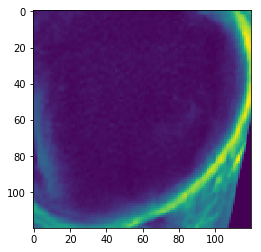

In [125]:
tform = AffineTransform(scale=(1.13, 1.1), rotation=0.003, shear=0.2, translation=(-2.5, -5))
image = warp(mfc[1].reshape(120,120), tform.inverse)
plt.imshow(image)

In [121]:

np.save('z1_aug',df1_aug_arr)
np.save('z2_aug',df2_aug_arr)



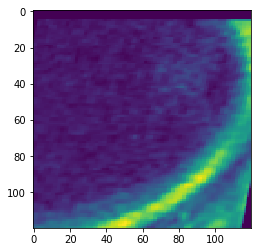

In [122]:
plt.imshow(z1_aug[0].reshape(120,120))

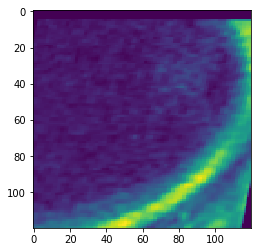

In [118]:
tform = AffineTransform(scale=(1.13, 1.1), rotation=0.003, shear=0.2, translation=(2.5, 5))
image = warp(lfc[0].reshape(120,120), tform.inverse)
plt.imshow(image)

In [127]:
z1_aug = []
import skimage.transform 
from skimage.transform import warp, AffineTransform
for i in range(0,1585):
    
    tform = AffineTransform(scale=(1.13, 1.1), rotation=0.003, shear=0.2, translation=(2.5, 5))
    image = warp(lfc[i].reshape(120,120), tform.inverse)
    z1_aug.append(image.ravel())

print(z1_aug)

df1_aug = pd.DataFrame({'z1_aug': z1_aug})   
df1_aug_arr = df1_aug.as_matrix()
print(df1_aug_arr)
z2_aug = []
import skimage.transform 
from skimage.transform import warp, AffineTransform
for i in range(0,1585):
    
    tform = AffineTransform(scale=(1.13, 1.1), rotation=0.01, shear=0.25, translation=(-2.5, 5))
    image = warp(mfc[i].reshape(120,120), tform.inverse)
    z2_aug.append(image.ravel())

print(z2_aug)

df2_aug = pd.DataFrame({'z2_aug': z2_aug})   
df2_aug_arr = df2_aug.as_matrix()
    
    

[array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,

[array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,

In [128]:
np.save('z2_aug_new',df2_aug_arr)


In [172]:
z1_aug = np.zeros(np.shape(lfc))
import skimage.transform 
from skimage.transform import warp, AffineTransform
for i in range(0,1585):
    
    tform = AffineTransform(scale=(1.13, 1.1), rotation=0.003, shear=0.2, translation=(2.5, 5))
    img0 = warp(lfc[i].reshape(120,120), tform.inverse).ravel()
    z1_aug=np.vstack((img0,z1))
    

print(z1_aug)

    

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [194]:
z1_faug = np.zeros(np.shape(lfc))
import skimage.transform 
from skimage.transform import warp, AffineTransform
for i in range(0,1585):
    
    
    tform = AffineTransform(scale=(1.13, 0.99), rotation=0.01, shear=0.32, translation=(-2.5, -5))
    img0 = warp(lfc[i].reshape(120,120), tform.inverse).ravel()
    z1_faug=np.vstack((img0,z1))
    

print(z1_faug)


[[ 6.20097077  7.62314698  7.59362152 ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]


(3171, 14400)


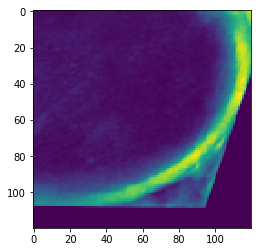

In [215]:
print(z1_faug.shape)
np.save('z1_faug', z1_faug)
plt.imshow(z1_faug[0].reshape(120,120))


(3171, 14400)


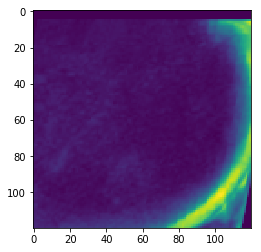

In [214]:
print(z1_aug.shape)
plt.imshow(z1_aug[0].reshape(120,120))
np.save('z1_aug_formatted',z1_aug)

In [ ]:
z1_aug = []
import skimage.transform 
from skimage.transform import warp, AffineTransform
for i in range(0,1585):
    
    tform = AffineTransform(scale=(1.13, 1.1), rotation=0.003, shear=0.2, translation=(2.5, 5))
    image = warp(lfc[i].reshape(120,120), tform.inverse)
    z1_aug.append(image.ravel())

print(z1_aug)

df1_aug = pd.DataFrame({'z1_aug': z1_aug})   
df1_aug_arr = df1_aug.as_matrix()
print(df1_aug_arr)
z2_aug = []
import skimage.transform 
from skimage.transform import warp, AffineTransform
for i in range(0,1585):
    
    tform = AffineTransform(scale=(1.13, 1.1), rotation=0.003, shear=0.2, translation=(-2.5, 5))
    image = warp(mfc[i].reshape(120,120), tform.inverse)
    z2_aug.append(image.ravel())

print(z2_aug)

df2_aug = pd.DataFrame({'z2_aug': z2_aug})   
df2_aug_arr = df2_aug.as_matrix()
    
    

In [208]:
from skimage import exposure
from sklearn.preprocessing import normalize
z1_intensity_aug = np.zeros(np.shape(mfc))

for i in range(0,1585):
    img = normalize(mfc[i].reshape(120,120), norm="max")

    # Equalization
    img_eq = exposure.equalize_hist(img)

    # Adaptive Equalization
    img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)
    
    img0 = img_adapteq.ravel()
    z1_intensity_aug=np.vstack((img0,z1))

print(z1_intensity_aug)

[[ 0.88272446  0.88272446  0.88272446 ...,  0.73845201  0.73845201
   0.73845201]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]


In [212]:

np.save('z1_intensity',z1_intensity_aug)

In [29]:
from sklearn.decomposition import PCA

for i in range(0,1585):
    X = lfc[i].reshape(120,120)
    pca = PCA(n_components=10)
    pca.fit(X)
    PCA(copy=True, iterated_power='auto', n_components=2, random_state=None, svd_solver='auto', tol=0.0, whiten=False)
    #print(pca.explained_variance_ratio_)
    print(pca.components_)
    df5= pd.DataFrame({'lfciVariance':pca.explained_variance_ratio_.tolist()})
    #df5.append(pca.explained_variance_ratio_)
    
df5

[[ 0.06526447  0.06526447  0.06463936 ..., -0.018173    0.03023183
   0.03023183]
 [ 0.04668387  0.04668387  0.04989229 ..., -0.09472922 -0.05050372
  -0.05050372]
 [-0.05255054 -0.05255054 -0.05034484 ..., -0.00154258  0.04245     0.04245   ]
 ..., 
 [ 0.06103848  0.06103848  0.08933416 ..., -0.11313779 -0.07582131
  -0.07582131]
 [-0.03392487 -0.03392487 -0.03406391 ..., -0.23126303 -0.34115241
  -0.34115241]
 [ 0.03034734  0.03034734  0.00907061 ...,  0.04304825  0.16635641
   0.16635641]]
[[ 0.05698069  0.06142646  0.06302226 ..., -0.02561972 -0.01870648
  -0.01228512]
 [-0.00345687 -0.00522969 -0.00049572 ..., -0.22596394 -0.1945066
  -0.11233011]
 [ 0.11501836  0.11640959  0.11521724 ..., -0.00420349  0.0168575
   0.00532453]
 ..., 
 [ 0.0101028  -0.00924908  0.02540648 ...,  0.09746462  0.16401183
   0.18040266]
 [ 0.00684695 -0.03024203 -0.06658955 ...,  0.12477073  0.14185046
   0.1309689 ]
 [ 0.01464767  0.03034859  0.08176811 ...,  0.00088728  0.13330567
   0.24247342]]
[[ 0

[[ 0.08884542  0.09170583  0.09162432 ..., -0.01975401 -0.00742579
   0.02578859]
 [-0.07597726 -0.07709835 -0.07759883 ..., -0.02940619  0.00753272
   0.06284972]
 [-0.00042407 -0.01287862 -0.02096585 ...,  0.12620555  0.12961557
   0.10486723]
 ..., 
 [-0.11149897 -0.11369828 -0.08771631 ..., -0.05047301 -0.07584246
  -0.08586654]
 [-0.02183866 -0.02657147 -0.02285621 ..., -0.0108786  -0.11131703
  -0.30702361]
 [-0.06293095 -0.07512792 -0.02767884 ...,  0.19857809  0.08197091
  -0.21834592]]
[[ 0.12874665  0.1302499   0.11512306 ...,  0.01414654  0.02705246
   0.0345076 ]
 [ 0.03064746  0.03035234  0.03977192 ..., -0.08842007 -0.02337541
  -0.00545796]
 [-0.00175578  0.01417037  0.02439149 ...,  0.15373339  0.06607815
   0.02768808]
 ..., 
 [-0.04731486  0.02208329  0.13768589 ...,  0.14160476  0.39451796
   0.40035132]
 [ 0.08879672  0.04828943 -0.06852526 ...,  0.12277152  0.11881307
   0.08675827]
 [ 0.00358663 -0.103112   -0.2154587  ..., -0.0833402   0.07013351
   0.2044558 ]]


  -0.16312098]]
[[ 0.16426129  0.1674852   0.15701966 ...,  0.01851762  0.02463977
   0.02130813]
 [ 0.08950324  0.09196761  0.10441519 ...,  0.04117347  0.04237276
   0.04399467]
 [-0.07416486 -0.05787679 -0.01236147 ..., -0.10571226 -0.16175049
  -0.18349388]
 ..., 
 [ 0.4453599   0.36053962  0.04955602 ..., -0.00815128 -0.10926343
  -0.14392193]
 [ 0.07189599  0.0899025   0.0432787  ...,  0.09667651  0.2563704
   0.20548523]
 [ 0.04834122  0.13828346 -0.00750345 ...,  0.17304449 -0.00315421
  -0.03284621]]
[[ 0.06522001  0.06262578  0.06053884 ..., -0.0342854  -0.01748275
  -0.01173016]
 [ 0.0206101   0.01762284  0.01543087 ..., -0.0228412  -0.01911676
  -0.0196161 ]
 [ 0.07386917  0.08371157  0.0882826  ...,  0.06716375  0.0411449
  -0.02640672]
 ..., 
 [-0.1197778  -0.13117888 -0.12196649 ...,  0.0081316   0.05886008
   0.11918099]
 [ 0.08871378  0.1335317   0.14260318 ..., -0.12249108 -0.03153489
   0.01835422]
 [-0.06368184 -0.07092491 -0.04992157 ..., -0.03441826  0.20751241
  

   0.00874814]]
[[ 0.10378153  0.10759464  0.1101846  ...,  0.05781729  0.07470418
   0.10462503]
 [-0.00403514 -0.01997418 -0.03126941 ..., -0.0139531  -0.00987816
   0.01236646]
 [ 0.05605728  0.04513751  0.03801086 ...,  0.04775502  0.02900604
  -0.09578408]
 ..., 
 [ 0.01582023  0.02773999  0.01744443 ...,  0.26974564  0.27037339
   0.28801906]
 [ 0.07987143  0.16640012  0.18605133 ...,  0.07091023  0.06773728
   0.08026353]
 [-0.03267976  0.03801856  0.0759022  ..., -0.17720617 -0.17495935
  -0.11703292]]
[[ 0.03497423  0.03497423  0.03683959 ..., -0.07950787 -0.06197118
  -0.06197118]
 [-0.05001288 -0.05001288 -0.05057815 ..., -0.06217376 -0.05003388
  -0.05003388]
 [ 0.11737377  0.11737377  0.12124584 ..., -0.04755561 -0.01729329
  -0.01729329]
 ..., 
 [ 0.01593211  0.01593211  0.02063889 ..., -0.04139004 -0.04982964
  -0.04982964]
 [-0.06382174 -0.06382174 -0.0611967  ...,  0.06546996  0.0480117
   0.0480117 ]
 [ 0.09040793  0.09040793  0.08951025 ...,  0.06535021  0.12013196
 

   0.03073621]]
[[  8.76284986e-02   8.76284986e-02   8.76284986e-02 ...,   5.33804396e-02
    5.33804396e-02   5.33804396e-02]
 [  1.05438223e-01   1.05438223e-01   1.05438223e-01 ...,   4.37751754e-03
    4.37751754e-03   4.37751754e-03]
 [  8.75051313e-02   8.75051313e-02   8.75051313e-02 ...,  -1.67314560e-02
   -1.67314560e-02  -1.67314560e-02]
 ..., 
 [ -2.15411941e-02  -2.15411941e-02  -2.15411941e-02 ...,   8.50014812e-02
    8.50014812e-02   8.50014812e-02]
 [ -5.59445518e-02  -5.59445518e-02  -5.59445518e-02 ...,  -2.25971264e-01
   -2.25971264e-01  -2.25971264e-01]
 [ -4.39567218e-05  -4.39567218e-05  -4.39567218e-05 ...,   2.01965339e-02
    2.01965339e-02   2.01965339e-02]]
[[ 0.0774406   0.07671588  0.0733961  ...,  0.0067641   0.01553054
   0.03803509]
 [ 0.11670451  0.1202642   0.12457454 ..., -0.08086242 -0.06689917
  -0.01962504]
 [ 0.02638412 -0.01622455 -0.0341049  ..., -0.12001411 -0.10320729 -0.05698   ]
 ..., 
 [-0.03001575 -0.06517629 -0.0877067  ..., -0.3972872

   0.03688598]]
[[-0.1188528  -0.1188528  -0.1188528  ...,  0.08063236  0.08063236
   0.08063236]
 [-0.00333821 -0.00333821 -0.00333821 ...,  0.00324299  0.00324299
   0.00324299]
 [ 0.15518763  0.15518763  0.15518763 ...,  0.08228318  0.08228318
   0.08228318]
 ..., 
 [-0.22474644 -0.22474644 -0.22474644 ...,  0.01162524  0.01162524
   0.01162524]
 [-0.10314446 -0.10314446 -0.10314446 ..., -0.12052922 -0.12052922
  -0.12052922]
 [ 0.03539432  0.03539432  0.03539432 ..., -0.0662932  -0.0662932
  -0.0662932 ]]
[[ 0.10229613  0.10226157  0.10177537 ...,  0.08564937  0.08552436
   0.08568185]
 [ 0.13339829  0.13726123  0.13223425 ..., -0.19225338 -0.19558554
  -0.20394049]
 [ 0.18829707  0.1694367   0.16514843 ...,  0.17642214  0.18114556
   0.19531173]
 ..., 
 [ 0.01718273 -0.42925662 -0.31998491 ...,  0.01590746 -0.02821111
   0.00099738]
 [-0.         -0.03098179  0.07011559 ..., -0.00837505  0.07341792
  -0.01219801]
 [-0.00415145 -0.04697156  0.28218395 ..., -0.12039065  0.02847636
 

  -0.284851  ]]
[[  7.12514753e-02   7.51506900e-02   7.70227276e-02 ...,   5.87181758e-03
    2.15800302e-02   3.66440323e-02]
 [ -2.15577174e-02  -1.82754622e-02  -2.20851138e-02 ...,   4.16585782e-02
    8.26293227e-02   7.53834911e-02]
 [  2.18375854e-02   1.05397405e-02  -5.95645381e-04 ...,  -6.96570144e-03
   -1.94529426e-04  -1.27518340e-02]
 ..., 
 [  2.07280224e-02   2.08240436e-02   4.76884772e-02 ...,   5.95292080e-02
    1.93281944e-03  -3.00544695e-02]
 [  5.89581734e-02   1.19804282e-01   1.53862477e-01 ...,  -1.13213892e-01
    6.82950625e-02   4.77875180e-02]
 [ -3.38222158e-02  -4.31742476e-02  -1.96770326e-02 ...,  -2.38322595e-01
    2.64575054e-01   3.43121255e-01]]
[[  1.06154743e-01   1.06751554e-01   1.06751554e-01 ...,   5.60156509e-02
    5.52051546e-02   5.46431213e-02]
 [ -7.24385724e-02  -8.09130979e-02  -8.09130979e-02 ...,   1.66616248e-01
    1.65756207e-01   1.91238396e-01]
 [  9.97855209e-02   2.42468676e-02   2.42468676e-02 ...,  -8.36258716e-02
   -1

   0.31712077]]
[[ 0.06034987  0.06608578  0.07334946 ..., -0.06616751 -0.03389268
  -0.02858806]
 [-0.019386   -0.0196519  -0.03304477 ..., -0.11872657 -0.13662335
  -0.1382136 ]
 [-0.06503271 -0.04992821 -0.02316739 ..., -0.15730052 -0.06737855
  -0.03017994]
 ..., 
 [-0.0107893  -0.0119726   0.00768169 ..., -0.07557063  0.08015337
   0.10993732]
 [-0.03243614 -0.04835494 -0.01708804 ...,  0.1689591   0.10959278
   0.07939463]
 [-0.01117513 -0.01773545 -0.00041775 ..., -0.11404208 -0.37596628
  -0.40361618]]
[[ 0.09831605  0.11337267  0.12245213 ..., -0.03286865 -0.02647314
  -0.00485885]
 [-0.06455126 -0.06948448 -0.07547353 ..., -0.17765256 -0.17039511
  -0.15627239]
 [-0.05362229 -0.05685097 -0.06843114 ..., -0.05697586 -0.06452549
  -0.08438458]
 ..., 
 [ 0.0336993   0.0175437   0.0226337  ...,  0.11094234  0.10184784
   0.07699772]
 [ 0.02154451  0.01851905 -0.00795493 ...,  0.04714458  0.15954763
   0.37593234]
 [-0.13977734 -0.09935147 -0.0877812  ...,  0.22994343  0.21067097


   0.12837923]]
[[ 0.06912433  0.07463004  0.07412007 ...,  0.01425513  0.02546405
   0.03964096]
 [-0.02224759 -0.01715684 -0.01533688 ..., -0.1440295  -0.07999879
  -0.04020967]
 [ 0.00715024  0.00769459  0.01219738 ...,  0.123692    0.06039097
  -0.08222739]
 ..., 
 [-0.04354127 -0.04185372 -0.0454651  ...,  0.02989906  0.14457132
   0.14186118]
 [ 0.00337056 -0.06063405 -0.0818981  ..., -0.36660521 -0.42213297
  -0.43801155]
 [ 0.05565985  0.00939817 -0.01014655 ...,  0.28035541  0.1094147
  -0.07329837]]
[[ 0.1204989   0.14785919  0.15526656 ..., -0.03719935 -0.02659645
  -0.00993723]
 [ 0.00926491 -0.00356349 -0.00997836 ..., -0.00370379  0.01976971
   0.07686921]
 [-0.05649717 -0.04555134 -0.02368206 ..., -0.00775442 -0.00902034
  -0.00331047]
 ..., 
 [-0.0876801  -0.07291851 -0.03300195 ...,  0.19929925  0.29286274
   0.27578637]
 [-0.18007696 -0.16532288 -0.16016144 ...,  0.09966761  0.07034678
  -0.09158386]
 [-0.04966165 -0.05142403 -0.07938387 ..., -0.24379214 -0.03758866
 

[[ 0.10459053  0.10688476  0.10757767 ..., -0.05761422 -0.04317247
  -0.03793204]
 [-0.04393855 -0.04167222 -0.04013819 ..., -0.1459185  -0.15523246
  -0.15220533]
 [ 0.00152585  0.00728634  0.00571175 ...,  0.02406371 -0.00961931
  -0.02254983]
 ..., 
 [-0.0579054  -0.04212717 -0.0678604  ...,  0.09535349  0.15919451
   0.17004168]
 [-0.01293362 -0.06772725 -0.04128075 ...,  0.01159685 -0.2439191
  -0.39234536]
 [ 0.05332013  0.06782916  0.03950097 ...,  0.05583986 -0.15049435
  -0.30859317]]
[[ 0.0805086   0.09005172  0.09268954 ..., -0.03173391 -0.02692277
  -0.00192331]
 [ 0.04840556  0.05853403  0.0634483  ...,  0.16373272  0.13350255
   0.07095501]
 [ 0.04723746  0.0678619   0.07177314 ..., -0.20386294 -0.16634871
  -0.0758844 ]
 ..., 
 [ 0.01764884  0.00096678 -0.01245776 ...,  0.17444222  0.23730748
   0.31790737]
 [-0.05912051 -0.04971139 -0.02618492 ...,  0.05699541  0.09327997
   0.01970773]
 [-0.00425974 -0.07316524 -0.05747892 ..., -0.19943943 -0.12732649
   0.17617492]]
[

[[ 0.06808654  0.07541182  0.08291378 ..., -0.04197379 -0.03347535
  -0.02451896]
 [-0.05116256 -0.05452298 -0.05761022 ..., -0.08080623 -0.05656839
  -0.02824768]
 [-0.03245296 -0.05169951 -0.07036108 ...,  0.0688081   0.05792916
   0.02410481]
 ..., 
 [ 0.06354114  0.07175389  0.0808751  ..., -0.01682279  0.01418921
   0.02575028]
 [-0.03677585 -0.04456796 -0.08397807 ..., -0.04351323  0.01484402
   0.02821377]
 [-0.04590565 -0.04192619 -0.04039387 ..., -0.21659777 -0.30445566
  -0.25700189]]
[[ 0.08182509  0.08803433  0.09500544 ...,  0.00686839  0.00946481
   0.01351552]
 [-0.05246647 -0.05460907 -0.06308259 ..., -0.07285151 -0.05017092
  -0.02496622]
 [ 0.03584765  0.02845402  0.0139982  ...,  0.07284102  0.06113959
   0.04654496]
 ..., 
 [ 0.03338184  0.03561161  0.06148724 ...,  0.23656252  0.30117277
   0.23786335]
 [-0.18064432 -0.17552148 -0.14536433 ..., -0.11695539 -0.17622674
  -0.19886501]
 [ 0.13415244  0.09491993  0.01377296 ...,  0.23432677  0.14142596
   0.06896808]]


   0.480784  ]]
[[  6.28246496e-02   7.21160190e-02   8.12316738e-02 ...,   2.02387807e-02
    2.05780805e-02   1.91885336e-02]
 [ -2.47299118e-02  -5.64268252e-03   7.18974969e-03 ...,   8.95205026e-02
    7.32381933e-02   2.68035029e-02]
 [ -1.22264844e-02  -1.74913264e-02  -3.28652106e-02 ...,  -6.15497055e-05
   -8.75339609e-03  -3.17410525e-02]
 ..., 
 [  5.40467933e-02   4.02287057e-02   4.92451825e-02 ...,  -2.33571575e-02
    5.64515847e-02   5.46084870e-02]
 [ -1.87864619e-01  -1.73655695e-01  -1.63764504e-01 ...,   2.70858782e-01
    4.13768940e-01   4.84671613e-01]
 [ -3.03895425e-02   8.41057688e-02   1.12303621e-01 ...,  -1.37710905e-01
   -4.15791442e-02   8.81027147e-02]]
[[ 0.07563383  0.07744673  0.07776971 ...,  0.01673547  0.01911248
   0.02171149]
 [-0.01414988 -0.01687361 -0.0206467  ...,  0.00344534  0.01540048
   0.02013324]
 [-0.04173619 -0.05009089 -0.05452534 ...,  0.02222937 -0.00461893
  -0.01698239]
 ..., 
 [-0.03160827 -0.03390053 -0.0110995  ...,  0.11928

  -0.44858955]]
[[ 0.03183128  0.0213119   0.02059115 ...,  0.02151851  0.02969159
   0.03703559]
 [-0.08072856 -0.07161264 -0.06712625 ...,  0.03945484  0.03664686
  -0.00331818]
 [-0.07288197 -0.10738617 -0.118438   ...,  0.0010201  -0.0039327
  -0.02398496]
 ..., 
 [ 0.07564924  0.10111931  0.10733934 ...,  0.19119471  0.20310052
   0.16738339]
 [ 0.07970165  0.00913479 -0.03197932 ...,  0.26683926  0.28173784
   0.25488763]
 [-0.16005595 -0.14973516 -0.16488704 ...,  0.08540348  0.1650347
   0.12945105]]
[[ 0.10714567  0.11137736  0.11080877 ..., -0.03573093 -0.02026111
  -0.01590411]
 [ 0.02797524  0.0301452   0.03299545 ..., -0.08860783 -0.04038412
  -0.00500378]
 [-0.15124426 -0.16383113 -0.16301865 ...,  0.00785514 -0.00880357
  -0.02232401]
 ..., 
 [-0.02151968  0.00290629  0.02312386 ...,  0.30678766  0.13076576
   0.08314431]
 [-0.11902046 -0.10679232 -0.12157369 ..., -0.01868998 -0.17291067
  -0.16715038]
 [ 0.05358413  0.05688974  0.01806264 ...,  0.26447948  0.2601719
   

[[ 0.15015429  0.15573406  0.15572864 ..., -0.01939076  0.02251676
   0.04773262]
 [-0.02340068 -0.03542361 -0.03014124 ...,  0.05229134  0.10323853
   0.11109316]
 [-0.01220294 -0.00252329 -0.01719063 ..., -0.08658523 -0.01712667
   0.0338322 ]
 ..., 
 [-0.04992993 -0.02218695 -0.02779789 ..., -0.27906354 -0.20269394
  -0.13607829]
 [-0.05261484 -0.06694094 -0.03313095 ..., -0.21112277 -0.27817055
  -0.31998249]
 [-0.01597981 -0.03716636 -0.05761779 ...,  0.03797081 -0.08638861
  -0.10159115]]
[[ 0.14180039  0.13340252  0.12957242 ..., -0.00355597  0.01831843
   0.03677693]
 [-0.04075491 -0.04239692 -0.04096825 ..., -0.072271   -0.06001672
  -0.03418891]
 [-0.06176212 -0.0625796  -0.05816434 ...,  0.00774372 -0.02635142
  -0.03989287]
 ..., 
 [ 0.00043896  0.08961179  0.08191543 ..., -0.09991476 -0.16475127
  -0.30335566]
 [-0.12494913 -0.06692409 -0.03236274 ..., -0.04609568  0.11914073
   0.30353309]
 [-0.01941385 -0.04069625 -0.03265874 ..., -0.04196589  0.18446092
   0.33926083]]


  -0.33364693]]
[[ 0.08739384  0.07822673  0.07420482 ...,  0.0144466   0.05701915
   0.06848646]
 [-0.01606916 -0.00918946 -0.01627431 ...,  0.01477566  0.0491173
   0.07000046]
 [-0.03589354 -0.04123388 -0.05699896 ..., -0.05268046 -0.06471016
  -0.01667586]
 ..., 
 [ 0.05015998  0.02997532  0.04569908 ..., -0.25482365 -0.28005525
  -0.15261599]
 [ 0.03674035 -0.00658872  0.06015338 ...,  0.08972996  0.25933645
   0.27761941]
 [-0.01961421 -0.06840154 -0.05571402 ...,  0.37203007  0.03983267
  -0.0793491 ]]
[[ 0.07572461  0.07503595  0.07244051 ...,  0.04169802  0.06274498
   0.06297403]
 [-0.02553846 -0.02363415 -0.02259349 ..., -0.08872812 -0.01601827
   0.00808159]
 [ 0.01399193  0.01919597  0.0107611  ..., -0.15287541 -0.07406458
   0.00307347]
 ..., 
 [-0.03058253  0.00333341 -0.04558794 ..., -0.134459   -0.07470012
  -0.04162979]
 [ 0.12402566  0.11482812  0.10064318 ...,  0.02319763  0.10034238
  -0.04008263]
 [ 0.00700351 -0.00205997 -0.03679458 ...,  0.29853601  0.08941243
 

[[  8.58159605e-02   8.87549881e-02   9.27418421e-02 ...,  -5.02942246e-02
   -2.24938634e-02  -8.81547824e-03]
 [  1.24651421e-01   1.19668871e-01   1.09273625e-01 ...,   2.21700066e-03
    4.96388086e-02   6.51875158e-02]
 [  7.71140045e-02   7.39055860e-02   6.90101720e-02 ...,   1.40029925e-02
   -8.93404011e-02  -1.36050507e-01]
 ..., 
 [ -8.13540351e-02  -6.73770051e-02  -5.80532537e-02 ...,   3.28278047e-01
    2.93759973e-01   2.87494371e-01]
 [  1.17336430e-02  -1.22673749e-02   3.64010623e-02 ...,  -1.45158822e-01
    8.20930308e-05   5.04130717e-02]
 [  6.00116752e-02   5.09060653e-02   9.73793892e-02 ...,   4.44844364e-02
   -1.10841568e-01  -1.59814672e-01]]
[[  1.65967123e-01   1.59000600e-01   1.40926414e-01 ...,  -7.64055633e-02
   -7.04849202e-02  -6.26313763e-02]
 [  3.69507381e-02   3.67227549e-02   3.31656102e-02 ...,  -4.43455723e-02
   -5.03724938e-02  -2.63284266e-02]
 [  2.27661273e-02   3.48587386e-02   5.49923159e-02 ...,   1.86089448e-02
    1.51083974e-02  -

[[ 0.07947217  0.08181659  0.08568542 ..., -0.08844813 -0.07457159
  -0.047479  ]
 [-0.02412339 -0.02462545 -0.02123005 ..., -0.04506387 -0.02517858
  -0.00556337]
 [-0.01883445 -0.01947223 -0.02434149 ..., -0.09642922 -0.11298925
  -0.08141363]
 ..., 
 [ 0.06925976  0.07425294  0.04051807 ...,  0.09197697  0.27556121
   0.32787422]
 [ 0.04624769  0.03455638  0.03895327 ...,  0.10074446  0.05989087
   0.18264829]
 [-0.0095804  -0.02580276 -0.04051231 ...,  0.09674582  0.02359892
   0.01679627]]
[[ 0.02943375  0.03411472  0.04586082 ..., -0.01355613 -0.00470872
  -0.00803431]
 [ 0.00439568  0.00464478  0.0050588  ...,  0.04418766  0.09690918
   0.10086951]
 [-0.08230165 -0.0777686  -0.07386357 ...,  0.08081803  0.09660375
   0.0955227 ]
 ..., 
 [-0.14234258 -0.15292706 -0.15724646 ..., -0.30960595 -0.20185194
  -0.13070584]
 [ 0.01288462  0.00611796 -0.01362314 ...,  0.13241499  0.29029622
   0.21731084]
 [-0.06174427 -0.05098964 -0.03122843 ..., -0.05424503 -0.35707447
  -0.43491352]]


   -3.02144691e-02   2.60995223e-04]]
[[ 0.07077343  0.07499215  0.08755065 ..., -0.00932395  0.01213524
   0.02322083]
 [-0.00096483  0.00431742  0.02009937 ...,  0.08108788  0.06943414
   0.05017137]
 [-0.02307382 -0.02159883 -0.01752685 ..., -0.04899114 -0.02340367
   0.01985879]
 ..., 
 [-0.02552279 -0.05208463 -0.07789058 ...,  0.31429253  0.03191867
  -0.0747965 ]
 [-0.05963268 -0.05971898 -0.01838481 ..., -0.15384398 -0.06223708
  -0.05535288]
 [ 0.14002746  0.1461602   0.12853387 ...,  0.05520605 -0.13168925
  -0.183718  ]]
[[ 0.09885818  0.10645283  0.12203882 ..., -0.00201831  0.01623582
   0.01858064]
 [ 0.04344252  0.04300256  0.03183085 ...,  0.02256264  0.07125017
   0.08234962]
 [-0.17318451 -0.18222338 -0.18026926 ...,  0.00687739  0.04015414
   0.04790165]
 ..., 
 [-0.16693113 -0.14560331 -0.12694533 ...,  0.10030366  0.23912164
   0.26375248]
 [-0.00036251 -0.00436832 -0.01590228 ..., -0.01595766 -0.21192158
  -0.33368425]
 [-0.11821834 -0.12755522 -0.13184514 ...,  0

[[ 0.00949104  0.00949104  0.00949104 ...,  0.08354011  0.08354011
   0.08354011]
 [ 0.03883957  0.03883957  0.03883957 ..., -0.10220192 -0.10220192
  -0.10220192]
 [-0.06697299 -0.06697299 -0.06697299 ..., -0.02773589 -0.02773589
  -0.02773589]
 ..., 
 [ 0.07706705  0.07706705  0.07706705 ...,  0.06295796  0.06295796
   0.06295796]
 [ 0.09186545  0.09186545  0.09186545 ..., -0.14859916 -0.14859916
  -0.14859916]
 [ 0.02046002  0.02046002  0.02046002 ..., -0.12622433 -0.12622433
  -0.12622433]]
[[ 0.06981963  0.07189436  0.08524054 ..., -0.04304179 -0.02515747
  -0.01943636]
 [-0.01868302 -0.01940242 -0.02049531 ...,  0.0828505   0.09663789
   0.11051765]
 [-0.02372352 -0.02644632 -0.02688555 ..., -0.24146846 -0.20579898
  -0.19197678]
 ..., 
 [-0.0376293  -0.03761273 -0.0794409  ...,  0.15165042  0.03617646
  -0.02872842]
 [ 0.05895027  0.05919796  0.00859988 ..., -0.18016686 -0.37288598
  -0.32091198]
 [-0.0258235  -0.02175253 -0.01553299 ..., -0.003307   -0.21943179
  -0.20506804]]


[[ 0.05231665  0.05231665  0.05166246 ...,  0.00126583  0.03126086
   0.03126086]
 [ 0.04663877  0.04663877  0.04848382 ..., -0.02037386 -0.04168686
  -0.04168686]
 [-0.05011714 -0.05011714 -0.04959203 ...,  0.21529197  0.19787201
   0.19787201]
 ..., 
 [-0.06100786 -0.06100786 -0.06504312 ..., -0.04733279 -0.12272262
  -0.12272262]
 [ 0.0282203   0.0282203   0.01141212 ..., -0.03548909 -0.09916496
  -0.09916496]
 [ 0.03185842  0.03185842  0.04438308 ..., -0.07201635 -0.13592131
  -0.13592131]]
[[ 0.04624204  0.04624204  0.0484399  ...,  0.06306732  0.06604551
   0.06604551]
 [-0.01192623 -0.01192623 -0.01226376 ..., -0.02813433  0.02672058
   0.02672058]
 [-0.06374704 -0.06374704 -0.06553737 ...,  0.17362516  0.1726225
   0.1726225 ]
 ..., 
 [ 0.01564534  0.01564534  0.03368004 ...,  0.01580408  0.1568987
   0.1568987 ]
 [ 0.02258514  0.02258514  0.02141362 ..., -0.03266315 -0.05884118
  -0.05884118]
 [ 0.06630423  0.06630423  0.07777697 ..., -0.12545232 -0.14212545
  -0.14212545]]
[[

   0.44785694]]
[[ 0.04256644  0.046812    0.05291336 ..., -0.00097417  0.02956309
   0.04023096]
 [-0.02738864 -0.03388473 -0.03816667 ...,  0.00564201  0.03926171
   0.05880542]
 [ 0.08745272  0.09665316  0.10828236 ..., -0.32405746 -0.25110948
  -0.2060081 ]
 ..., 
 [-0.00628531  0.00243893 -0.02532224 ..., -0.09670354 -0.32896274
  -0.37048587]
 [-0.04596802 -0.01814688  0.02098306 ...,  0.04897876  0.09912781
  -0.02132266]
 [ 0.01284551  0.04166619  0.04803053 ...,  0.13823192 -0.1423957
  -0.14336264]]
[[ 0.0798457   0.08235684  0.08454274 ..., -0.01802578  0.0135386
   0.02772557]
 [-0.06139386 -0.06352532 -0.06360276 ...,  0.01782799  0.03809628
   0.05126793]
 [-0.16965216 -0.17520262 -0.18417062 ...,  0.2228974   0.23165586
   0.21871173]
 ..., 
 [ 0.05619779  0.07825203  0.16073632 ...,  0.01406312 -0.14346528
  -0.13286594]
 [-0.01437984  0.02114697  0.06994763 ...,  0.16134565  0.28871355
   0.30119826]
 [ 0.03735703  0.05190053  0.08374518 ..., -0.10234508 -0.17263935
  

  -0.13622628]]
[[ 0.06355194  0.06803029  0.06676815 ..., -0.11230366 -0.09025081
  -0.06606496]
 [-0.0077227  -0.01238584 -0.01205045 ..., -0.04002155 -0.01089563
   0.05598633]
 [-0.09686258 -0.08647745 -0.08435524 ...,  0.10035832  0.12230472
   0.16969128]
 ..., 
 [ 0.08502269  0.08208835  0.07530048 ...,  0.15381917  0.17399609
   0.08231171]
 [ 0.03834845  0.06223414  0.07685143 ..., -0.10610867 -0.16676666
  -0.16527233]
 [-0.05284305 -0.02950396 -0.01097011 ...,  0.11028177  0.1976817
   0.18586294]]
[[ 0.06768226  0.08044368  0.08712625 ...,  0.000859    0.0038674
   0.0139557 ]
 [ 0.09638098  0.08202561  0.08064144 ..., -0.01975307  0.00711075
   0.03441481]
 [ 0.08120203  0.07444697  0.07472659 ...,  0.03347086  0.0027359
  -0.04011825]
 ..., 
 [ 0.01180259  0.04618789  0.04193845 ...,  0.13063602  0.12415636
   0.09727236]
 [-0.16237598 -0.11978217 -0.09244765 ...,  0.14251485  0.08501983
   0.03777814]
 [-0.04179827  0.00374159  0.00830582 ...,  0.26979889  0.26285812
   

  -0.26976342]]
[[ 0.03893954  0.03893954  0.03922943 ..., -0.08736045 -0.07635114
  -0.07635114]
 [-0.04207268 -0.04207268 -0.04244883 ...,  0.06400404  0.08964637
   0.08964637]
 [ 0.05517954  0.05517954  0.0535381  ...,  0.08429555  0.098607    0.098607  ]
 ..., 
 [-0.04444889 -0.04444889 -0.04758738 ...,  0.20790329  0.18852085
   0.18852085]
 [ 0.07342936  0.07342936  0.07207989 ...,  0.13497742  0.31610588
   0.31610588]
 [-0.04465476 -0.04465476 -0.03001383 ..., -0.06070491 -0.02986926
  -0.02986926]]
[[ 0.05656793  0.06239089  0.06586319 ..., -0.00308442  0.00092287
  -0.00054097]
 [-0.00111449 -0.00342749 -0.0095907  ..., -0.12019044 -0.05372964
  -0.0006314 ]
 [ 0.0186811   0.00758675  0.01043579 ..., -0.18778816 -0.13856305
  -0.1446557 ]
 ..., 
 [ 0.01327522  0.01040511 -0.00342864 ..., -0.19380385 -0.19172043
  -0.02603455]
 [-0.02887165 -0.02370769 -0.02071054 ...,  0.17830686  0.33618578
   0.1871755 ]
 [ 0.0022307   0.0032469   0.00164789 ..., -0.10215654  0.17086757
  

   0.04066462]]
[[ 0.09131637  0.09071936  0.08822135 ..., -0.05586683 -0.02864188
  -0.01308435]
 [-0.0565789  -0.05554548 -0.05704692 ...,  0.07488182  0.0820317
   0.07760785]
 [-0.07678517 -0.07786354 -0.07833619 ..., -0.01657824 -0.0187935
  -0.02466947]
 ..., 
 [-0.02654267 -0.03132472 -0.00919642 ..., -0.26872212 -0.32960533
  -0.39363573]
 [ 0.02316411  0.05128245  0.07112609 ..., -0.02797485  0.05295081
   0.16489466]
 [ 0.00435548  0.00052278 -0.02653537 ...,  0.152138    0.19034185
   0.18214745]]
[[ 0.07945843  0.08375607  0.08551484 ..., -0.0136724  -0.02669673
  -0.03187816]
 [-0.03532015 -0.04001941 -0.04433558 ..., -0.06359884 -0.01812838
   0.00337953]
 [-0.03760758 -0.04129834 -0.0399473  ..., -0.01251792  0.00935668
   0.00632227]
 ..., 
 [ 0.05750723  0.06077769  0.09050538 ...,  0.00409739 -0.12529287
  -0.202333  ]
 [-0.08399208 -0.11208766 -0.18903563 ..., -0.19582353 -0.20992025
  -0.19136653]
 [-0.05365729 -0.03252873  0.00983297 ...,  0.00449973 -0.07715186
  

[[  6.69136592e-02   7.72642483e-02   8.38716641e-02 ...,   4.26947481e-03
    6.99481367e-03   1.37192805e-02]
 [  9.24833016e-03   1.17469528e-02   1.71013834e-02 ...,   4.24691893e-02
    1.79100348e-02  -2.44791111e-02]
 [ -2.51930872e-03  -1.49906177e-02  -2.30423759e-02 ...,  -5.09687470e-02
   -2.67157896e-02   1.69298354e-02]
 ..., 
 [  6.15148806e-02   4.25814379e-02   3.77568906e-02 ...,  -1.51227626e-01
   -3.07483777e-02   5.15757341e-02]
 [  8.31234577e-03  -9.04553523e-03  -2.10424024e-02 ...,  -1.36996768e-01
   -2.69547308e-01  -3.81142051e-01]
 [ -8.82540827e-02  -7.46398311e-02  -5.90042377e-02 ...,   1.25610510e-01
    1.61476724e-04  -1.68947493e-01]]
[[ 0.07067601  0.07789723  0.08517063 ...,  0.0092961   0.01563832
   0.02431754]
 [-0.01911925 -0.01356886 -0.00668124 ..., -0.00676192 -0.02759943
  -0.05252352]
 [ 0.02971684  0.03518379  0.03448977 ..., -0.03421841 -0.0109989
   0.03090084]
 ..., 
 [-0.11199449 -0.10511464 -0.09889247 ...,  0.37868947  0.2966468
  

   0.11131931]]
[[ 0.13455335  0.13528202  0.13728842 ..., -0.14040528 -0.12564968
  -0.09198805]
 [-0.04486219 -0.04772548 -0.04452373 ..., -0.03143364 -0.0118818
   0.0342487 ]
 [-0.02675151 -0.03612283 -0.04117311 ..., -0.02456629 -0.02038661
  -0.06407401]
 ..., 
 [ 0.13135945  0.10421813  0.03323642 ...,  0.20309275  0.24836182
   0.23067572]
 [ 0.01914204 -0.06547475 -0.06413571 ...,  0.02107556  0.11648508
   0.26194439]
 [ 0.22059198  0.08122165 -0.03001641 ..., -0.05193179 -0.109065
  -0.21023543]]
[[ 0.06512196  0.07892604  0.08397883 ..., -0.09000014 -0.07816972
  -0.05121642]
 [ 0.08436834  0.05773921  0.04606029 ..., -0.0779696  -0.05252977
  -0.00566014]
 [ 0.06552101  0.04060556  0.02775674 ...,  0.00764633 -0.02927951
  -0.0960716 ]
 ..., 
 [ 0.00886816  0.01709418 -0.00121468 ...,  0.19795763  0.1176762
  -0.08196217]
 [ 0.03762787  0.04852663  0.03260335 ...,  0.08557769  0.14363161
   0.16978947]
 [-0.07794634 -0.00758755 -0.03616731 ..., -0.06142571 -0.29941364
  -0

[[ 0.12490876  0.13499819  0.15546467 ..., -0.01879051  0.00466752
   0.01257549]
 [ 0.00863647  0.00097431 -0.00954965 ...,  0.04335199  0.08444544
   0.09483233]
 [ 0.01777191  0.00452683 -0.02084515 ...,  0.00496089 -0.05697327
  -0.08831723]
 ..., 
 [-0.03139138 -0.01596517  0.02452323 ..., -0.2225156  -0.02123827
   0.04985666]
 [-0.24576199 -0.24021602 -0.23093172 ...,  0.25504348  0.21955323
   0.15760063]
 [-0.12461742 -0.09199082 -0.02566086 ..., -0.0427826  -0.0728338
  -0.13661524]]
[[ 0.13428544  0.14433239  0.15706389 ...,  0.01838623  0.02720079
   0.02945184]
 [-0.00132562 -0.00650971 -0.01536543 ...,  0.05057435  0.0905365
   0.09800612]
 [-0.0202612  -0.03798818 -0.06860368 ..., -0.02408757 -0.07755586
  -0.1024129 ]
 ..., 
 [ 0.05832048  0.07005017  0.0582442  ...,  0.11925152  0.22282473
   0.22042349]
 [ 0.13756746  0.10101856 -0.01028199 ..., -0.12422979 -0.06442562
  -0.01633921]
 [ 0.24908564  0.23168255  0.14275938 ...,  0.00042315  0.03485999
  -0.01077865]]
[[

[[ 0.0555221   0.05393456  0.05076324 ...,  0.04343647  0.0388652
   0.02241407]
 [ 0.15610028  0.1675784   0.16888573 ..., -0.02628564 -0.00484006
   0.01428973]
 [-0.00390662  0.00795984  0.00877345 ...,  0.11015077  0.04375928
  -0.04593502]
 ..., 
 [-0.00613579  0.01828278  0.02824724 ...,  0.30080682  0.2788788
   0.17589392]
 [-0.03959921 -0.00183231  0.06552818 ..., -0.13401952 -0.13761335
   0.03870837]
 [ 0.03034406  0.03088929 -0.00851681 ..., -0.10719742 -0.13780467
  -0.03378016]]
[[  1.49014397e-01   1.55850908e-01   1.59645701e-01 ...,  -1.57139890e-02
    2.62895069e-03   1.48186257e-02]
 [ -3.58605950e-03  -4.01399404e-04   9.49628957e-05 ...,   1.08846923e-01
    6.89745829e-02   4.73373565e-02]
 [ -3.84707543e-02  -4.20894738e-02  -4.84870871e-02 ...,  -6.83728515e-02
   -2.64218678e-02   1.31784866e-02]
 ..., 
 [  1.49825376e-01   2.05268152e-01   2.59946384e-01 ...,  -2.59235426e-01
   -1.34983498e-01  -1.27237517e-01]
 [  2.19783356e-01   2.15797269e-01   1.7895628

   0.06044815]]
[[ 0.05069498  0.05434102  0.05608842 ..., -0.01651659 -0.00621748
   0.00279847]
 [ 0.04998572  0.05074069  0.05624416 ...,  0.01888333  0.0097271
  -0.03978819]
 [-0.03978638 -0.05079328 -0.06037515 ..., -0.01899018 -0.06723744
  -0.12048643]
 ..., 
 [ 0.11494771  0.09981497  0.07485607 ..., -0.19894254 -0.30958573
  -0.24655529]
 [-0.05854601 -0.04588652 -0.04171252 ..., -0.13606331 -0.21530541
  -0.30761535]
 [ 0.06617799  0.09035065  0.06793555 ...,  0.04331368 -0.00069998
  -0.15504437]]
[[ 0.07151887  0.0790446   0.08338961 ...,  0.03103137  0.04396394
   0.06421945]
 [ 0.0080064   0.00870012  0.0064023  ..., -0.05078293 -0.0473797
  -0.03059481]
 [ 0.11621789  0.11660098  0.12167018 ..., -0.14545662 -0.13164617
  -0.01921603]
 ..., 
 [ 0.01718476  0.0027282   0.01506336 ..., -0.09648381 -0.09228916
  -0.15289508]
 [-0.04712686  0.01861415  0.0417204  ...,  0.0784352   0.20919225
   0.21072203]
 [-0.05495487 -0.05845411 -0.066935   ..., -0.18058202 -0.09815963
  

   0.12638611]]
[[ 0.07087592  0.0772888   0.09182701 ..., -0.04741871 -0.0109957
   0.00119673]
 [ 0.01418696  0.02011224  0.03415062 ...,  0.0732633   0.03910995
   0.0116436 ]
 [ 0.04247284  0.03237267  0.02831029 ...,  0.0644648   0.05452247
   0.04510535]
 ..., 
 [-0.02176226 -0.01892349 -0.01075544 ...,  0.07059343 -0.04397739
  -0.09294825]
 [ 0.15384269  0.07320805 -0.00283181 ...,  0.29584327  0.02892712
  -0.06557863]
 [-0.08587604 -0.05971818 -0.00114275 ...,  0.31965953  0.06640286
  -0.04715089]]
[[ 0.06855856  0.07355551  0.0783711  ..., -0.00672831 -0.00887786
  -0.01143813]
 [ 0.0790757   0.07856883  0.07869136 ..., -0.07617147 -0.05812925
  -0.03908375]
 [ 0.09784795  0.09590968  0.08790218 ...,  0.0507002   0.04993451
   0.04321326]
 ..., 
 [-0.14207481 -0.14869424 -0.15798803 ...,  0.14233907  0.20566661
   0.24113524]
 [ 0.07471077  0.0870161   0.11104498 ...,  0.16708523  0.10596823
  -0.00853799]
 [ 0.09025892  0.05484263  0.02599955 ...,  0.13039634  0.17256186
 

  -0.23146594]]
[[ 0.11440377  0.10844297  0.10132568 ..., -0.09431793 -0.07851601
  -0.06398804]
 [-0.07775308 -0.07983946 -0.08847376 ...,  0.10582549  0.10030116
   0.10184122]
 [ 0.00415206 -0.02414728 -0.03428301 ..., -0.08843705 -0.08381538
  -0.07271393]
 ..., 
 [-0.11923912 -0.11009521 -0.09620825 ...,  0.15312424  0.0012625
   0.00714864]
 [-0.08006961 -0.11369548 -0.0833469  ..., -0.29125089 -0.27447541
   0.12578656]
 [-0.00909232 -0.05151134 -0.02452967 ...,  0.09046606  0.15996753
   0.44963951]]
[[ 0.10914694  0.10420973  0.10406992 ..., -0.05114402 -0.03825     0.00056688]
 [ 0.06436001  0.05672742  0.05460778 ..., -0.06262179 -0.06312387
  -0.04297898]
 [ 0.02815471  0.03897089  0.04656101 ...,  0.05697426  0.0617123
   0.03831853]
 ..., 
 [ 0.05657757  0.11101991  0.11103082 ..., -0.17348889 -0.17299518
  -0.06030685]
 [-0.09444701 -0.11717206 -0.10442405 ..., -0.26657442 -0.14266805
   0.0259674 ]
 [ 0.08322679 -0.01381964  0.01975206 ..., -0.03653176 -0.01694997
   0

[[  6.29192819e-02   6.61842859e-02   6.90952798e-02 ...,  -7.62218067e-02
   -4.82922353e-02   1.85630622e-02]
 [  2.47859622e-02   1.83406195e-02   1.54392968e-02 ...,  -5.03801452e-03
    2.66641623e-04   1.79520196e-02]
 [ -3.59677517e-02  -2.95750253e-02  -2.20154025e-02 ...,  -6.92226600e-02
   -8.30491494e-02  -4.60909829e-02]
 ..., 
 [ -6.46387300e-02  -1.02152766e-01  -1.05848228e-01 ...,   6.10133104e-02
    1.14064178e-01   8.94230598e-02]
 [ -1.38063179e-02   1.70704038e-03   1.22354394e-02 ...,  -1.65431335e-01
    6.87896395e-02   1.70147841e-01]
 [  5.62900097e-03  -1.50769969e-03  -1.70554120e-02 ...,   3.33592900e-01
    3.64870863e-01   7.78393773e-02]]
[[ 0.03241237  0.03615131  0.04003045 ..., -0.08303627 -0.08353275
  -0.08039869]
 [ 0.06823623  0.06750827  0.06645331 ..., -0.1248457  -0.11972306
  -0.11492285]
 [ 0.02676514  0.02899795  0.02584952 ...,  0.11180321  0.15489777
   0.18142617]
 ..., 
 [-0.03540434 -0.03249952 -0.00494273 ...,  0.02058816  0.04533725


[[ 0.11124451  0.10293739  0.09927099 ..., -0.00250975  0.01510842
   0.04614193]
 [-0.09630242 -0.10057488 -0.10183277 ...,  0.0619629   0.05213557
   0.0458264 ]
 [-0.07350739 -0.06935166 -0.06762906 ..., -0.0146774  -0.00106134
   0.03714541]
 ..., 
 [-0.00917225 -0.02582824 -0.03618622 ..., -0.24958575 -0.32134096
  -0.35967352]
 [-0.17137371 -0.14225369 -0.13079379 ..., -0.05130366 -0.05540532
  -0.03036922]
 [-0.01253034  0.02602981  0.0197292  ..., -0.14935313 -0.23134388
  -0.24928615]]
[[  8.67040766e-02   8.71495092e-02   8.12369067e-02 ...,  -2.99232158e-02
   -1.94199871e-04   1.38396224e-02]
 [ -8.58923869e-02  -8.73166633e-02  -8.32049265e-02 ...,   6.32344887e-02
    6.61246658e-02   7.34614107e-02]
 [  6.11572723e-02   6.20253064e-02   6.38230401e-02 ...,  -6.05705044e-02
   -4.95444254e-02  -3.37006685e-02]
 ..., 
 [ -1.76780662e-02  -1.32847038e-02  -1.79907860e-02 ...,  -5.38279193e-02
   -1.48461397e-01  -1.56137867e-01]
 [ -2.54151472e-02  -3.89913098e-02  -2.66624

[[ 0.13367111  0.1458318   0.15401421 ...,  0.01121512  0.04507398
   0.0847394 ]
 [ 0.09738841  0.08811085  0.08284437 ..., -0.00720682  0.01771164
   0.05773043]
 [ 0.10775625  0.11916259  0.11663788 ...,  0.01045098 -0.01607578
  -0.00682865]
 ..., 
 [ 0.03829548  0.05514247  0.05032197 ..., -0.09859464 -0.09905214
  -0.04512555]
 [ 0.07494872  0.01824774 -0.01039986 ..., -0.10043906 -0.16698642
  -0.19646308]
 [-0.00155806  0.00835568  0.01759583 ...,  0.0751973   0.03981157
   0.0083989 ]]
[[ 0.16938035  0.18264119  0.18631469 ...,  0.03563468  0.06494268
   0.0719548 ]
 [-0.09899598 -0.10986255 -0.11397855 ...,  0.02306243  0.00258339
   0.00110797]
 [ 0.06845719  0.03424529 -0.01098489 ..., -0.07947212 -0.01974629
   0.01562648]
 ..., 
 [ 0.03609754 -0.01630151  0.01874349 ...,  0.11865113  0.12863329
   0.09521032]
 [ 0.24464563  0.20127662  0.01518689 ...,  0.11867151 -0.02192526
  -0.08976628]
 [ 0.09206748  0.07523753  0.02493133 ..., -0.1404403  -0.12901409
  -0.10896835]]


  -0.423447  ]]
[[ 0.13610884  0.13486133  0.12384172 ..., -0.04888901 -0.03548032
  -0.0302031 ]
 [ 0.0222421   0.01599774  0.01210511 ..., -0.13032057 -0.12229171
  -0.11661615]
 [ 0.06971213  0.04939004  0.01315909 ...,  0.038939    0.09574507
   0.09161635]
 ..., 
 [-0.10591966 -0.07904835 -0.01685745 ..., -0.31873448 -0.02001396
   0.11709888]
 [ 0.1686479   0.07365786  0.01940926 ..., -0.17630716 -0.30786526
  -0.22501006]
 [-0.00699254 -0.00349355  0.00272834 ...,  0.2081095   0.04646023
  -0.11880713]]
[[ 0.09419608  0.10350941  0.10610399 ..., -0.18156081 -0.16997246
  -0.1288802 ]
 [ 0.01729589  0.00083753 -0.0068238  ..., -0.11369529 -0.11690916
  -0.08539667]
 [ 0.10845778  0.10472734  0.09720108 ..., -0.00782818  0.01142859
   0.02832904]
 ..., 
 [-0.04760155  0.02533085  0.03604727 ..., -0.09564745  0.23818494
   0.38935019]
 [-0.16622145 -0.14723835 -0.13811124 ...,  0.02068442  0.1117503
  -0.08934816]
 [-0.09435821  0.02363188  0.05493062 ...,  0.10019826  0.01179322
 

[[ 0.03847851  0.04264014  0.04570003 ...,  0.00128919  0.00648947
   0.0136686 ]
 [-0.06238648 -0.05624377 -0.05343899 ...,  0.04693534  0.05109249
   0.06716966]
 [-0.03223631 -0.04629579 -0.05088292 ..., -0.00458339  0.00135351
   0.0456346 ]
 ..., 
 [-0.04728845 -0.04511852 -0.05265483 ...,  0.03294388 -0.03242594
  -0.10642217]
 [-0.06515099 -0.1109336  -0.10978463 ..., -0.03217874  0.09015817
   0.23205989]
 [-0.10395664 -0.10980581 -0.11922963 ..., -0.24253363 -0.18766923
   0.08000729]]
[[ 0.08308909  0.08308909  0.08308909 ..., -0.05172918 -0.05172918
  -0.05172918]
 [ 0.08526432  0.08526432  0.08526432 ...,  0.19143766  0.19143766
   0.19143766]
 [ 0.04225758  0.04225758  0.04225758 ..., -0.09531415 -0.09531415
  -0.09531415]
 ..., 
 [ 0.01721769  0.01721769  0.01721769 ..., -0.0855699  -0.0855699
  -0.0855699 ]
 [ 0.0384333   0.0384333   0.0384333  ...,  0.00334972  0.00334972
   0.00334972]
 [-0.14055708 -0.14055708 -0.14055708 ...,  0.10738652  0.10738652
   0.10738652]]
[

[[ 0.09610218  0.10068398  0.10530859 ..., -0.04773579 -0.0369752
  -0.00791125]
 [ 0.01580817  0.01353642  0.00384347 ..., -0.17112457 -0.11939501
  -0.01118475]
 [ 0.00263956  0.01330152  0.03099429 ..., -0.0647802  -0.06085359
   0.00151455]
 ..., 
 [-0.02145262  0.03378407  0.09341313 ..., -0.14199862 -0.28370441
  -0.35787773]
 [-0.04218429 -0.01321397  0.01209932 ..., -0.02287031  0.15346194
   0.30391793]
 [ 0.07174479  0.13175097  0.12211892 ..., -0.00136342  0.09990115
   0.22307123]]
[[ 0.13138277  0.16195391  0.17953108 ..., -0.03494023 -0.02515519
  -0.01231121]
 [ 0.02630852 -0.01582035 -0.04020442 ..., -0.19138155 -0.15226074
  -0.08538906]
 [ 0.00820085  0.0812045   0.13197163 ..., -0.15622985 -0.1595902
  -0.09222467]
 ..., 
 [ 0.11521723  0.11064942  0.06885595 ...,  0.26738089  0.35531204
   0.30703082]
 [ 0.07055657  0.03947993  0.04199777 ..., -0.10732019 -0.20844478
  -0.32056924]
 [-0.10553089 -0.20806215 -0.05978466 ..., -0.03697637 -0.06217963
  -0.16897757]]
[[

   0.0295321 ]]
[[ 0.06897425  0.0769124   0.10315437 ..., -0.02966562 -0.02264285
  -0.01241673]
 [-0.12102383 -0.13532953 -0.13751999 ...,  0.00978661  0.0130585
   0.01701797]
 [-0.01206982 -0.0090095  -0.02686598 ..., -0.11343367 -0.08341877
  -0.05326199]
 ..., 
 [-0.03902099 -0.02991885 -0.04553894 ..., -0.2786217  -0.22218233
  -0.1656323 ]
 [-0.07809169 -0.11396239 -0.05290899 ..., -0.22502383 -0.20999204
  -0.18037539]
 [-0.12018453 -0.1451345  -0.1834278  ...,  0.24153309  0.26124244
   0.24000715]]
[[ 0.06670959  0.07016521  0.07148764 ..., -0.05133219 -0.04846983
  -0.05290211]
 [-0.17003109 -0.19122316 -0.20558177 ...,  0.04936922  0.07078039
   0.07796439]
 [-0.07641197 -0.07347635 -0.07348414 ..., -0.03596652 -0.07528893
  -0.09241237]
 ..., 
 [-0.00107701  0.03831196  0.0073737  ...,  0.27860319  0.27188293
   0.16176398]
 [ 0.02227229  0.05192571 -0.02098936 ...,  0.16331407  0.28995532
   0.2839121 ]
 [ 0.09562897  0.05565028  0.02846797 ...,  0.03733214  0.02603586
 

   0.12998151]]
[[ 0.04907945  0.04874436  0.04911018 ..., -0.01619017 -0.01151774
   0.0016817 ]
 [-0.07555161 -0.07273618 -0.06724525 ...,  0.06511463  0.04789669
   0.00317541]
 [ 0.06399193  0.06547412  0.06088535 ...,  0.09321733  0.08084443
   0.01478261]
 ..., 
 [-0.1760722  -0.16999293 -0.16735621 ..., -0.19692455 -0.28329281
  -0.30186607]
 [-0.06945876 -0.07762263 -0.09040434 ..., -0.00395794 -0.08608548
  -0.18892129]
 [-0.04481436 -0.02150636 -0.03437017 ..., -0.04618195 -0.08048561
  -0.06851793]]
[[ 0.06170707  0.06884326  0.07024386 ...,  0.00808576  0.02199284
   0.0518936 ]
 [-0.03162078 -0.03091718 -0.02325573 ...,  0.02697599  0.02986149
  -0.00348688]
 [ 0.06547565  0.06047639  0.04832319 ..., -0.15610151 -0.08615317
   0.11765798]
 ..., 
 [-0.00864651  0.0198988  -0.00346926 ...,  0.01710691  0.16313805
   0.17957229]
 [-0.07889104 -0.056158   -0.04360284 ..., -0.27323327 -0.07068463
   0.26117749]
 [ 0.02478684  0.00674425  0.00820827 ..., -0.04171265 -0.01218006


   -4.98017361e-02  -3.44013951e-02]]
[[  6.53033245e-02   6.49237450e-02   6.29025549e-02 ...,  -2.70056972e-02
   -8.96257163e-03   2.52296075e-02]
 [  6.94454029e-03   7.00680731e-03   9.34978005e-03 ...,  -3.38699776e-02
   -2.78611901e-02  -5.15903251e-02]
 [  2.59566326e-02   9.62970424e-03   1.69112468e-04 ...,   2.22135354e-02
   -2.16470811e-02  -9.82802947e-02]
 ..., 
 [  1.68652148e-02   4.55233575e-02   3.80905077e-02 ...,   1.41207719e-01
    6.07141064e-02  -1.15105820e-02]
 [ -1.55025359e-01  -1.24169638e-01  -1.12295794e-01 ...,  -6.89214207e-02
   -8.44205303e-02  -1.26335429e-01]
 [  5.02195586e-02   3.43417664e-02   2.76165604e-02 ...,  -1.39050149e-01
    4.24880392e-02   5.19801478e-01]]
[[ 0.05706008  0.05620534  0.05567253 ..., -0.00327935  0.01788335
   0.03133161]
 [-0.00655478 -0.0013774   0.00630307 ..., -0.00772807 -0.02964226
  -0.04072371]
 [-0.01136262 -0.00916367  0.00426757 ..., -0.07782039 -0.04161361
  -0.02268226]
 ..., 
 [-0.12695217 -0.13069915 -0.

  -0.21947967]]
[[ 0.01795522  0.02703841  0.03164665 ..., -0.00884638  0.00055999
  -0.00255233]
 [-0.00199157 -0.00503557 -0.00485523 ..., -0.02131488 -0.01720004
  -0.01821206]
 [-0.08052781 -0.07684646 -0.07643364 ..., -0.09614452 -0.08862912
  -0.05328044]
 ..., 
 [ 0.05471022  0.02248646  0.00437183 ...,  0.02631586  0.12798558
   0.24864278]
 [-0.13281003 -0.06550869 -0.04613706 ..., -0.02274574  0.09287882
   0.28790938]
 [ 0.12440973  0.1086363   0.09959997 ..., -0.05847826  0.01342563
   0.04845123]]
[[  2.24054194e-02   3.28900917e-02   4.02224678e-02 ...,   1.99700580e-02
    2.19839729e-02   2.58649269e-02]
 [ -1.22772788e-03  -1.10777581e-02  -1.47587889e-02 ...,   9.64303318e-05
    3.76613226e-03   1.39207867e-02]
 [ -7.50812765e-02  -7.05949247e-02  -6.54270910e-02 ...,  -8.79984480e-02
   -6.85916753e-02  -2.44717710e-02]
 ..., 
 [  3.47236834e-02   1.07360944e-02   4.70130440e-03 ...,   1.09022022e-01
    1.96589909e-01   3.08833171e-01]
 [  2.10369124e-02   2.667537

,lfciVariance
0,0.477782
1,0.294601
2,0.094290
3,0.042024
4,0.029556
5,0.026322
6,0.011799
7,0.006966
8,0.004762
9,0.002580


AssertionError: Expected 3d/4d array of form (N, height, width) or (N, height, width, channels), got shape (1585, 14400).

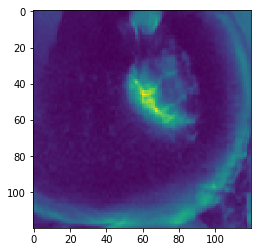

In [36]:
plt.imshow(lfc[993].reshape(120,120))
import imgaug as ia
from imgaug import augmenters as iaa
images = lfc
seq = iaa.Sequential([
    iaa.Fliplr(0.5), # horizontal flips
    iaa.Crop(percent=(0, 0.1)), # random crops
    # Small gaussian blur with random sigma between 0 and 0.5.
    # But we only blur about 50% of all images.
    iaa.Sometimes(0.5,
        iaa.GaussianBlur(sigma=(0, 0.5))
    ),
    # Strengthen or weaken the contrast in each image.
    iaa.ContrastNormalization((0.75, 1.5)),
    # Add gaussian noise.
    # For 50% of all images, we sample the noise once per pixel.
    # For the other 50% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    iaa.Multiply((0.8, 1.2), per_channel=0.2),
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        rotate=(-25, 25),
        shear=(-8, 8)
    )
], random_order=True) # apply augmenters in random order

images_aug = seq.augment_images(images)

In [143]:
z1_aug = []
import skimage.transform 
from skimage.transform import warp, AffineTransform
from skimage.morphology import disk
from skimage import filters
gaussian_lfc = filters.gaussian(lfc[0].reshape(120,120), 3)
for i in range(0,1585):
    
    gaussian_lfc = filters.gaussian(mfc[0].reshape(120,120), 3)
    z1_aug.append(gaussian_lfc.ravel())

print(z1_aug)

df1_aug = pd.DataFrame({'z1_aug': z1_aug})   
df1_aug_filters = df1_aug.as_matrix()
print(df1_aug_arr)
z2_aug = []
import skimage.transform 
from skimage.transform import warp, AffineTransform
for i in range(0,1585):
    
    tform = AffineTransform(scale=(1.23, 0.9), rotation=0.01, shear=0.48, translation=(-3.5, -5))
    image = warp(mfc[i].reshape(120,120), tform.inverse)
    z2_aug.append(image.ravel())

print(z2_aug)

df2_aug = pd.DataFrame({'z2_aug': z2_aug})   
df2_aug_arr = df2_aug.as_matrix()
    

[array([  61.53281906,   61.89395565,   61.85246009, ...,  199.47444607,
        211.26748956,  220.55901994]), array([  61.53281906,   61.89395565,   61.85246009, ...,  199.47444607,
        211.26748956,  220.55901994]), array([  61.53281906,   61.89395565,   61.85246009, ...,  199.47444607,
        211.26748956,  220.55901994]), array([  61.53281906,   61.89395565,   61.85246009, ...,  199.47444607,
        211.26748956,  220.55901994]), array([  61.53281906,   61.89395565,   61.85246009, ...,  199.47444607,
        211.26748956,  220.55901994]), array([  61.53281906,   61.89395565,   61.85246009, ...,  199.47444607,
        211.26748956,  220.55901994]), array([  61.53281906,   61.89395565,   61.85246009, ...,  199.47444607,
        211.26748956,  220.55901994]), array([  61.53281906,   61.89395565,   61.85246009, ...,  199.47444607,
        211.26748956,  220.55901994]), array([  61.53281906,   61.89395565,   61.85246009, ...,  199.47444607,
        211.26748956,  220.55901994]), 

[array([ 56.20127269,  57.5923108 ,  54.9755483 , ...,   0.        ,
         0.        ,   0.        ]), array([ 18.40339774,  20.1701728 ,  21.06986871, ...,   0.        ,
         0.        ,   0.        ]), array([ 77.09357141,  73.51283072,  69.44052667, ...,   0.        ,
         0.        ,   0.        ]), array([ 53.95730513,  67.62373528,  66.50176233, ...,   0.        ,
         0.        ,   0.        ]), array([ 16.25006697,  15.11677186,   9.59671304, ...,   0.        ,
         0.        ,   0.        ]), array([ 29.63065545,  26.86711514,  26.07670523, ...,   0.        ,
         0.        ,   0.        ]), array([ 27.64140583,  26.81704262,  22.83563633, ...,   0.        ,
         0.        ,   0.        ]), array([ 37.10084009,  31.76479591,  30.04756262, ...,   0.        ,
         0.        ,   0.        ]), array([ 12.77098823,  12.95787285,  12.16024699, ...,   0.        ,
         0.        ,   0.        ]), array([  9.66187623,  10.25160865,  10.28857547, ..., 

In [150]:
np.save('z2_aug_filter',df1_aug_filters)



In [189]:
z1_fil_aug = np.zeros(np.shape(lfc))

from skimage.morphology import disk
from skimage import filters
gaussian_lfc = filters.gaussian(lfc[0].reshape(120,120), 3)
for i in range(0,1585):
    
    gaussian_lfc = filters.gaussian(mfc[0].reshape(120,120), 3).ravel()
    z1_fil_aug=np.vstack((gaussian_lfc,z1))

print(z1_fil_aug)


[[  61.53281906   61.89395565   61.85246009 ...,  199.47444607
   211.26748956  220.55901994]
 [   0.            0.            0.         ...,    0.            0.            0.        ]
 [   0.            0.            0.         ...,    0.            0.            0.        ]
 ..., 
 [   0.            0.            0.         ...,    0.            0.            0.        ]
 [   0.            0.            0.         ...,    0.            0.            0.        ]
 [   0.            0.            0.         ...,    0.            0.            0.        ]]


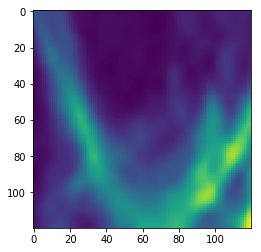

In [216]:
plt.imshow(z1_fil_aug[0].reshape(120,120))
np.save('z1_fil_aug', z1_fil_aug)

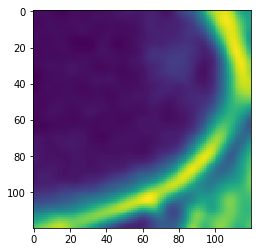

In [142]:
from skimage.morphology import disk
from skimage import filters
gaussian_lfc = filters.gaussian(lfc[0].reshape(120,120), 3)

plt.imshow(median_lfc)


#from skimage import restoration
#tv_coins = restoration.denoise_tv_chambolle(coins_zoom, weight=0.1)
#gaussian_coins = filters.gaussian(coins, sigma=2)